In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='month', ylabel='count'>

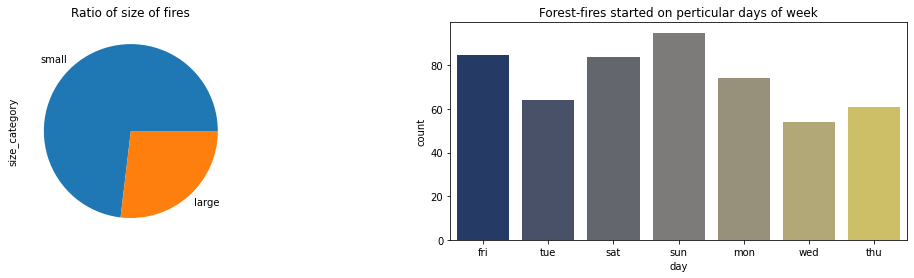

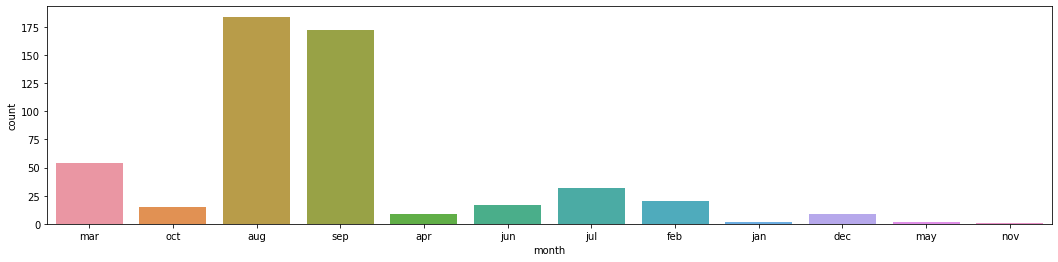

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,4),)
df['size_category'].value_counts().plot.pie(ax=ax1)
ax1.set_title('Ratio of size of fires')
sns.countplot(data=df,x='day',palette='cividis',ax=ax2)
ax2.set_title('Forest-fires started on perticular days of week')
plt.figure(figsize=(18,4))
sns.countplot(data=df,x='month',)

<AxesSubplot:xlabel='month', ylabel='count'>

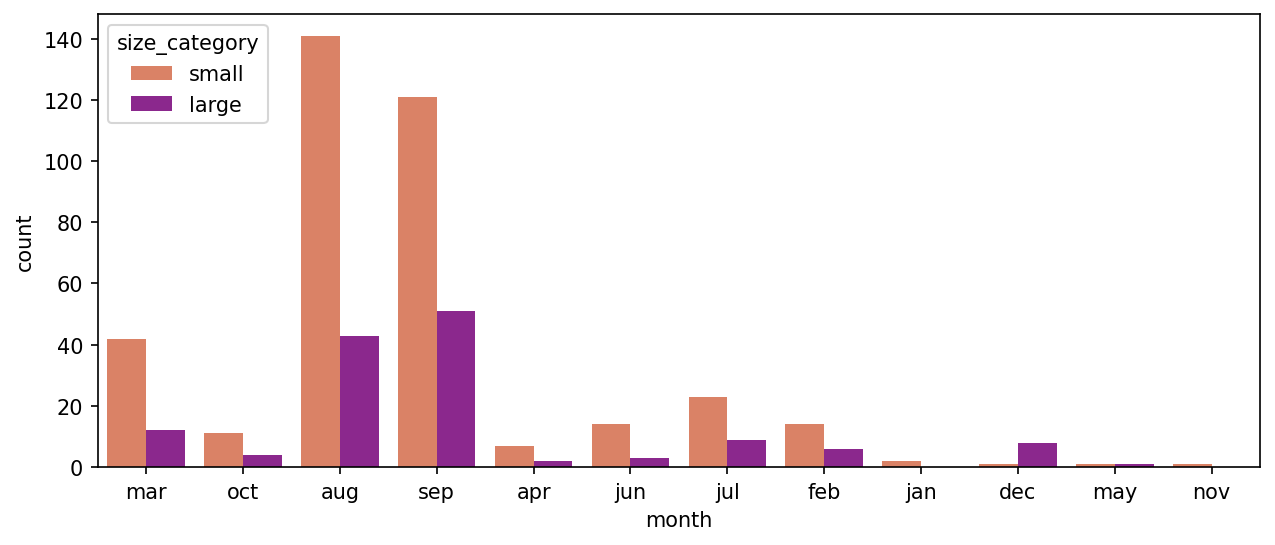

In [7]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=df,x='month',hue='size_category',palette='plasma_r')

<AxesSubplot:xlabel='temp', ylabel='area'>

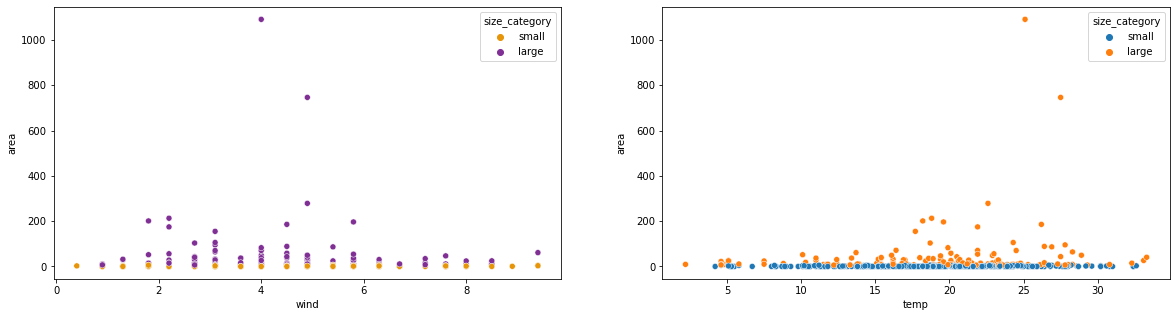

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(x=df['wind'],y=df['area'],hue=df['size_category'],palette='CMRmap_r',ax=ax1)
sns.scatterplot(x=df['temp'],y=df['area'],hue=df['size_category'],ax=ax2)

<AxesSubplot:xlabel='ISI', ylabel='area'>

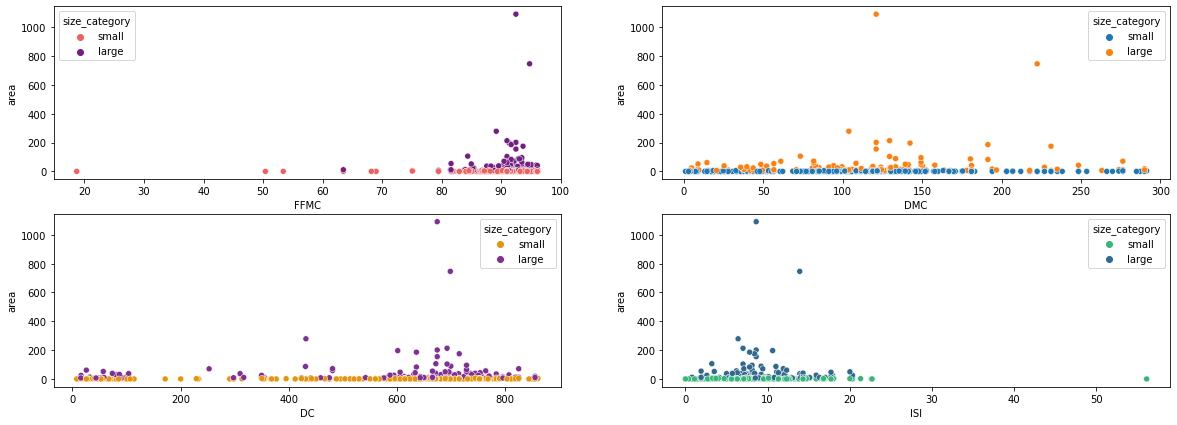

In [9]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20,7))
sns.scatterplot(x=df['FFMC'],y=df['area'],hue=df['size_category'],palette='magma_r',ax=ax1)
sns.scatterplot(x=df['DMC'],y=df['area'],hue=df['size_category'],ax=ax2)
sns.scatterplot(x=df['DC'],y=df['area'],hue=df['size_category'],palette='CMRmap_r',ax=ax3)
sns.scatterplot(x=df['ISI'],y=df['area'],hue=df['size_category'],palette='viridis_r',ax=ax4)

In [10]:
# Dropping duplicate features.
df = df.drop(columns=['month','day'],axis=1)

In [11]:
len(df.columns)

29

In [12]:
df['size_category'] = [1 if size == 'small' else 0 for size in df['size_category']]

In [13]:
df.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [14]:
df['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [15]:
X = df.drop('size_category',axis=1)
y = (df['size_category'])

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(45, input_dim=28, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                1305      
                                                                 
 dense_1 (Dense)             (None, 28)                1288      
                                                                 
 dense_2 (Dense)             (None, 1)                 29        
                                                                 
Total params: 2,622
Trainable params: 2,622
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Fit the model
history = model.fit(X, y, validation_split=0.30, epochs=200, batch_size=25)

Epoch 1/200
15/15 [==============================] - 1s 11ms/step - loss: 0.6165 - accuracy: 0.7535 - val_loss: 0.6382 - val_accuracy: 0.6731
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7562 - val_loss: 0.6579 - val_accuracy: 0.6731
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7562 - val_loss: 0.6537 - val_accuracy: 0.6731
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7562 - val_loss: 0.6538 - val_accuracy: 0.6731
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7562 - val_loss: 0.6484 - val_accuracy: 0.6731
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.7562 - val_loss: 0.6478 - val_accuracy: 0.6731
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7562 - val_loss: 0.6496 - val_accuracy: 0.6731
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9917 - val_loss: 0.1043 - val_accuracy: 0.9679
Epoch 60/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9861 - val_loss: 0.1069 - val_accuracy: 0.9551
Epoch 61/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9889 - val_loss: 0.1077 - val_accuracy: 0.9615
Epoch 62/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9917 - val_loss: 0.1113 - val_accuracy: 0.9551
Epoch 63/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9889 - val_loss: 0.0946 - val_accuracy: 0.9679
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9917 - val_loss: 0.0977 - val_accuracy: 0.9615
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9945 - val_loss: 0.1124 - val_accuracy: 0.9551
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.0924 - val_accuracy: 0.9615
Epoch 174/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9945 - val_loss: 0.1167 - val_accuracy: 0.9615
Epoch 175/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0960 - val_accuracy: 0.9615
Epoch 176/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.0966 - val_accuracy: 0.9615
Epoch 177/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9945 - val_loss: 0.1205 - val_accuracy: 0.9615
Epoch 178/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0934 - val_accuracy: 0.9679
Epoch 179/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0903 - val_accuracy: 0.9679
Epoch 180/200

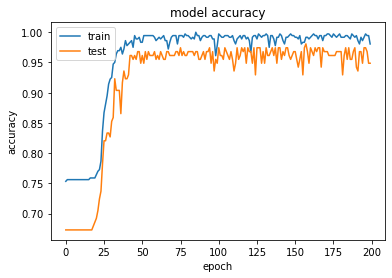

In [21]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

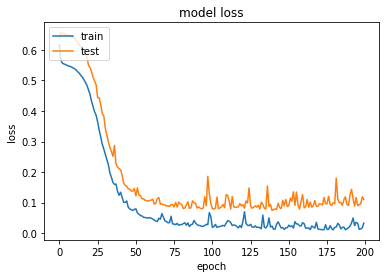

In [22]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model = Sequential()
model.add(Dense(45, input_dim=28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Fit the model
history = model.fit(X, y, validation_split=0.30, epochs=200, batch_size=25)

Epoch 1/200
15/15 [==============================] - 0s 8ms/step - loss: 13.8069 - accuracy: 0.5291 - val_loss: 13.9623 - val_accuracy: 0.6090
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 7.6004 - accuracy: 0.6565 - val_loss: 9.7661 - val_accuracy: 0.3462
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 3.5113 - accuracy: 0.5540 - val_loss: 2.7359 - val_accuracy: 0.4808
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.8964 - accuracy: 0.6371 - val_loss: 2.6397 - val_accuracy: 0.5000
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.9292 - accuracy: 0.7258 - val_loss: 1.5224 - val_accuracy: 0.5769
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.8006 - val_loss: 0.9440 - val_accuracy: 0.6410
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8338 - val_loss: 0.4218 - val_accuracy: 0.8590
Epoch 8/200

Epoch 59/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9917 - val_loss: 0.1802 - val_accuracy: 0.9103
Epoch 60/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9501 - val_loss: 0.1130 - val_accuracy: 0.9551
Epoch 61/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9751 - val_loss: 0.1057 - val_accuracy: 0.9615
Epoch 62/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.1048 - val_accuracy: 0.9615
Epoch 63/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9834 - val_loss: 0.1041 - val_accuracy: 0.9615
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9889 - val_loss: 0.1024 - val_accuracy: 0.9679
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9806 - val_loss: 0.1359 - val_accuracy: 0.9615
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9972 - val_loss: 0.1912 - val_accuracy: 0.9295
Epoch 174/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9751 - val_loss: 1.5510 - val_accuracy: 0.8397
Epoch 175/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9224 - val_loss: 0.2333 - val_accuracy: 0.9231
Epoch 176/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9668 - val_loss: 0.3688 - val_accuracy: 0.8654
Epoch 177/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9695 - val_loss: 0.1928 - val_accuracy: 0.9487
Epoch 178/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9695 - val_loss: 0.0880 - val_accuracy: 0.9615
Epoch 179/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9917 - val_loss: 0.1077 - val_accuracy: 0.9615
Epoch 180/200

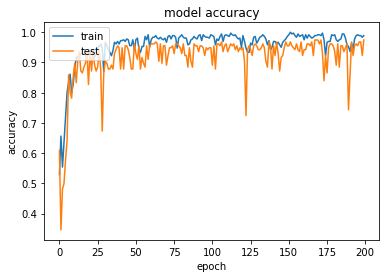

In [26]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

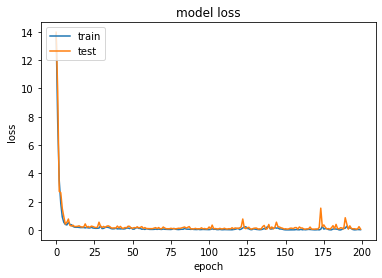

In [27]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X, y, epochs=25)


Epoch 1/25
17/17 [==============================] - 0s 748us/step - loss: 6.2864 - accuracy: 0.6364 - precision: 0.7568 - recall: 0.7407   
Epoch 2/25
17/17 [==============================] - 0s 748us/step - loss: 2.6955 - accuracy: 0.7021 - precision: 0.8011 - recall: 0.7884
Epoch 3/25
17/17 [==============================] - 0s 686us/step - loss: 1.3113 - accuracy: 0.7273 - precision: 0.8229 - recall: 0.7989
Epoch 4/25
17/17 [==============================] - 0s 686us/step - loss: 0.5949 - accuracy: 0.8317 - precision: 0.8473 - recall: 0.9392
Epoch 5/25
17/17 [==============================] - 0s 748us/step - loss: 0.3235 - accuracy: 0.8530 - precision: 0.8775 - recall: 0.9286
Epoch 6/25
17/17 [==============================] - 0s 810us/step - loss: 0.2771 - accuracy: 0.8859 - precision: 0.8978 - recall: 0.9524
Epoch 7/25
17/17 [==============================] - 0s 810us/step - loss: 0.2776 - accuracy: 0.8975 - precision: 0.9052 - recall: 0.9603
Epoch 8/25
17/17 [====================

In [29]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

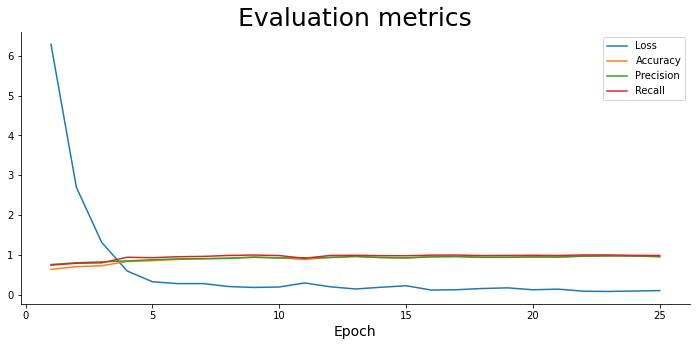

In [30]:
plt.plot(np.arange(1, 26), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 26), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 26), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 26), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=25)
plt.xlabel('Epoch', size=14)
plt.legend();

In [31]:
predictions = model.predict(X)
predictions

array([[9.92172539e-01],
       [9.99478579e-01],
       [9.99517798e-01],
       [9.99618053e-01],
       [9.99890327e-01],
       [9.96490955e-01],
       [9.97343242e-01],
       [9.99775589e-01],
       [9.99717891e-01],
       [9.99580741e-01],
       [9.99631524e-01],
       [9.99366343e-01],
       [9.99764800e-01],
       [9.99642968e-01],
       [9.99052942e-01],
       [9.99578714e-01],
       [9.98824239e-01],
       [9.99639869e-01],
       [9.97258306e-01],
       [9.95858729e-01],
       [9.99545634e-01],
       [9.99660432e-01],
       [9.99995232e-01],
       [9.98539567e-01],
       [9.98295188e-01],
       [9.99464571e-01],
       [9.99072313e-01],
       [9.99716878e-01],
       [9.99488711e-01],
       [9.99714255e-01],
       [9.99082327e-01],
       [9.99847710e-01],
       [9.99577999e-01],
       [9.99655724e-01],
       [9.99594033e-01],
       [9.99833345e-01],
       [9.99178171e-01],
       [9.99712467e-01],
       [9.99345303e-01],
       [9.96115208e-01],


In [32]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
print(prediction_classes[:20])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [33]:
loss, accuracy, precision, recall = model.evaluate(X, y)
loss, accuracy, precision, recall

17/17 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9226 - precision: 0.9043 - recall: 1.0000


(0.16112026572227478, 0.9226305484771729, 0.9043062329292297, 1.0)

In [34]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, prediction_classes))

[[ 99  40]
 [  0 378]]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy:  {accuracy_score(y, prediction_classes):.2f}')
print(f'Precision: {precision_score(y, prediction_classes):.2f}')
print(f'Recall:    {recall_score(y, prediction_classes):.2f}')

Accuracy:  0.92
Precision: 0.90
Recall:    1.00
